# Hierarchical clustering



Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar.

Types of hierarchical clustering:

*Agglomerative clustering(bottom-up)

*Divisive clustering(top-down)


# Agglomerative clustering



1.The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity.

2.It’s also known as AGNES (Agglomerative Nesting).

3.Also known as bottom-up approach or hierarchical agglomerative clustering (HAC).


# Divisive clustering



1.The divisive hierarchical clustering, also known as DIANA (DIvisive ANAlysis) is the inverse of agglomerative clustering.

2.Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster. We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering.


# Hierarchical Agglomerative vs Divisive clustering 

1.Divisive clustering is more complex as compared to agglomerative clustering, as in case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster.

2.Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves. Time complexity of a naive agglomerative clustering is O(n3) because we exhaustively scan the N x N matrix dist_mat for the lowest distance in each of N-1 iterations. Using priority queue data structure we can reduce this complexity to O(n2logn). By using some more optimizations it can be brought down to O(n2). Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters.

3.Divisive algorithm is also more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
x=np.array([[1,2],[3,4],[5,3],[7,9],[9,10]])
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  3],
       [ 7,  9],
       [ 9, 10]])

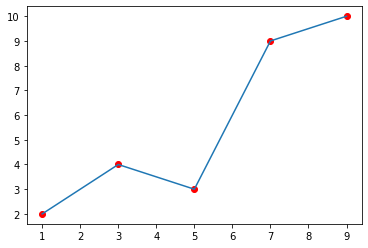

In [3]:
plt.scatter(x[:,0],x[:,1],color="r")
plt.plot(x[:,0],x[:,1])

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [5]:
ag=AgglomerativeClustering(distance_threshold=0, n_clusters=None)
ag.fit(x)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [6]:
ag.labels_

array([2, 4, 3, 1, 0], dtype=int64)

In [7]:
ag.fit_predict(x)

array([2, 4, 3, 1, 0], dtype=int64)

In [8]:
ag.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': 0,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': None}

In [9]:
ag.set_params()

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

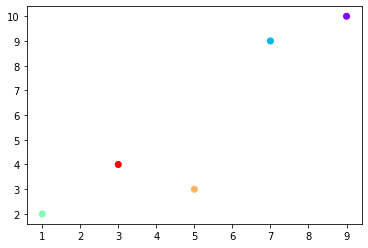

In [10]:
plt.scatter(x[:,0],x[:,1],c=ag.labels_,cmap='rainbow')

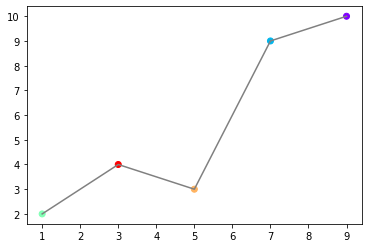

In [11]:
plt.scatter(x[:,0],x[:,1],c=ag.labels_,cmap='rainbow')
plt.plot(x[:,0],x[:,1],color="grey")

Plotting the dendogram

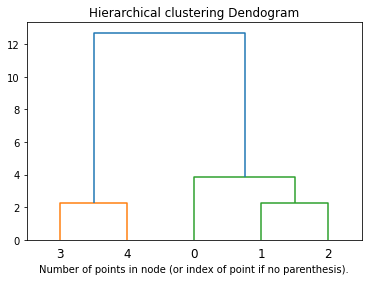

In [12]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(ag, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title("Hierarchical clustering Dendogram")
plt.show()

Another ways of plotting dendogram

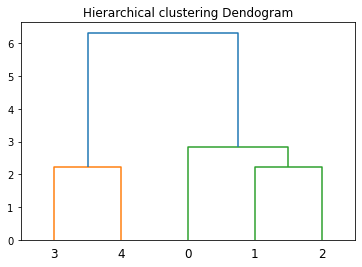

In [13]:
linked = linkage(x, 'single')

labelList = range(0,5)

plt.figure(figsize=(6, 4))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Hierarchical clustering Dendogram")
plt.show()

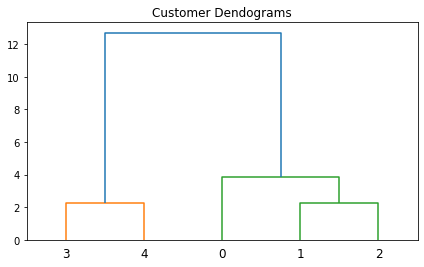

In [14]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(7, 4))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))